In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [216]:
train = pd.read_csv('train.csv', engine='python')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [217]:
test = pd.read_csv('test.csv', engine='python')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k: 2, inertia : 141731596052.6865
k: 3, inertia : 93263968980.8303
k: 4, inertia : 67366933376.6103
k: 5, inertia : 56459648679.0319
k: 6, inertia : 47063655777.2855
k: 7, inertia : 40041384909.0536
k: 8, inertia : 32744351078.3215
k: 9, inertia : 27965201748.6183
k: 10, inertia : 24313672662.1185


Text(0, 0.5, 'inertia')

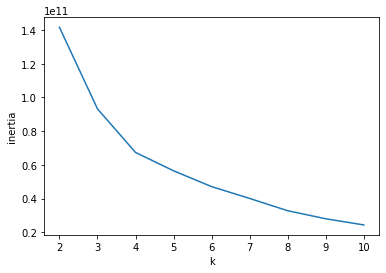

In [218]:
#적정 군집수 파악
cl_train = train['전력사용량(kWh)'].values.reshape(60, -1)
inertia_arr = []
k_arr = range(2, 11)

for k in k_arr:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cl_train)
    interia = kmeans.inertia_
    
    print('k: {0}, inertia : {1:.4f}'.format(k, interia))
    inertia_arr.append(interia)

plt.plot(k_arr, inertia_arr)
plt.xlabel('k')
plt.ylabel('inertia')

In [219]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(cl_train)
km_pred = km.predict(cl_train)

In [220]:
clusters = pd.DataFrame(km_pred)
clusters['num'] = train['num'].unique()
clusters

,0,num
0,1,1
1,2,2
2,0,3
3,2,4
4,0,5
5,2,6
6,2,7
7,3,8
8,2,9
9,2,10


In [221]:
train = train.merge(clusters, on='num')
train = train.rename(columns={0:'ass'})
test = test.merge(clusters, on='num')
test = test.rename(columns={0:'ass'})

In [222]:
# ice = pd.DataFrame(train['비전기냉방설비운영'])
# ice['num'] = train['num']
# ice =ice.drop_duplicates()

# hot = pd.DataFrame(train['태양광보유'])
# hot['num'] = train['num']
# hot = hot.drop_duplicates()

In [223]:
test.interpolate(method='values', inplace=True)
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,ass
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,NaN,NaN,1
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,NaN,NaN,1
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,NaN,NaN,1
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,NaN,NaN,1
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,0
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0


In [224]:
train[['num', '비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'비전기냉방설비운영']
    hot[count]=train.loc[i,'태양광보유']
    
for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

<AxesSubplot:xlabel='전력사용량(kWh)', ylabel='Density'>

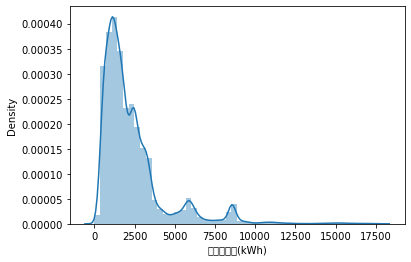

In [225]:
sns.distplot(train['전력사용량(kWh)'])

In [226]:
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

In [227]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday
test['date_time'] = pd.to_datetime(test['date_time'])
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday

In [228]:
def holiday(x):
    if str(x.date()) == '2020-06-06':
        return 1
    elif str(x.date()) == '2020-08-15':
        return 1
    elif x.weekday() == 5 or x.weekday() == 6:
        return 1
    else: 
        return 0

train['holiday'] = train['date_time'].apply(lambda x: holiday(x))
test['holiday'] = test['date_time'].apply(lambda x: holiday(x))

In [272]:
train2 = train.drop(['date_time', '전력사용량(kWh)'], axis=1)
test2 = test.drop(['date_time'], axis=1)

In [273]:
train2 = pd.get_dummies(train2, columns=['ass'])
test2 = pd.get_dummies(test2, columns=['ass'])

In [257]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(train2)
# train2_scaled = pd.DataFrame(scaler.transform(train2), columns=train2.columns)
# test2_scaled = pd.DataFrame(scaler.transform(test2), columns=test2.columns)

In [259]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, n_estimators=10000, colsample_bytree=0.5, subsample=0.7, max_depth=5, n_jobs=-1)

In [275]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
result = 0
best_score = 0
for train_idx, test_idx in kf.split(train2, train['전력사용량(kWh)']):
    x_train, x_val = train2.iloc[train_idx], train2.iloc[test_idx]
    y_train, y_val = train['전력사용량(kWh)'][train_idx], train['전력사용량(kWh)'][test_idx]
    xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], verbose=50, early_stopping_rounds=100)
    best_score+=xgb.best_score/5
    result += xgb.predict(test2)/5
    i += 1
    print(f'----------------------------------------n_fold:{i}----------------------------------------')

[0]	validation_0-rmse:2834.81958	validation_1-rmse:2831.58496


KeyboardInterrupt: 

In [59]:
from lightgbm import LGBMRegressor
li = LGBMRegressor(n_estimators=10000, random_state=42)

In [276]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
result2 = 0
best_score = 0
for train_idx, test_idx in kf.split(train2, train['전력사용량(kWh)']):
    x_train, x_val = train2.iloc[train_idx], train2.iloc[test_idx]
    y_train, y_val = train['전력사용량(kWh)'][train_idx], train['전력사용량(kWh)'][test_idx]
    li.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], verbose=50, early_stopping_rounds=50)
    result2 += li.predict(test2)/5
    i += 1
    print(f'----------------------------------------n_fold:{i}----------------------------------------')

Training until validation scores don't improve for 50 rounds
[50]	training's l2: 136412	valid_1's l2: 136391
[100]	training's l2: 88114.2	valid_1's l2: 89496.9
[150]	training's l2: 72003.8	valid_1's l2: 74627.7
[200]	training's l2: 61946.9	valid_1's l2: 66214.5
[250]	training's l2: 54412.9	valid_1's l2: 59844.9
[300]	training's l2: 48954	valid_1's l2: 55246
[350]	training's l2: 45445.8	valid_1's l2: 52704.4
[400]	training's l2: 42337.2	valid_1's l2: 50426.6
[450]	training's l2: 39804.2	valid_1's l2: 48932
[500]	training's l2: 37796.7	valid_1's l2: 47646.3
[550]	training's l2: 35957.1	valid_1's l2: 46546.3
[600]	training's l2: 34110	valid_1's l2: 45341.8
[650]	training's l2: 32508.9	valid_1's l2: 44309.6
[700]	training's l2: 31171.8	valid_1's l2: 43431.7
[750]	training's l2: 30023.7	valid_1's l2: 42801.8
[800]	training's l2: 29118.6	valid_1's l2: 42343
[850]	training's l2: 28167.5	valid_1's l2: 41978.3
[900]	training's l2: 27246	valid_1's l2: 41578.3
[950]	training's l2: 26466.8	valid_1

In [277]:
result2

array([8551.06880558, 8516.85732213, 8493.65602312, ..., 3624.09675521,
       3487.39794506, 3257.95867256])

In [245]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(li, train2, train['전력사용량(kWh)'], n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')
np.sqrt(-cvs.mean())

29.728377956689823

In [281]:
blending_result = result*0.6 + result2*0.4
blending_result

array([3420.42752223, 3406.74292885, 3397.46240925, ..., 1449.63870208,
       1394.95917802, 1303.18346902])

In [268]:
sub = pd.read_csv('sample_submission.csv')
sub

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [278]:
sub['answer'] = result2
sub

,num_date_time,answer
0,1 2020-08-25 00,8551.068806
1,1 2020-08-25 01,8516.857322
2,1 2020-08-25 02,8493.656023
3,1 2020-08-25 03,8477.055937
4,1 2020-08-25 04,8543.479125
...,...,...
10075,60 2020-08-31 19,3823.763319
10076,60 2020-08-31 20,3778.126984
10077,60 2020-08-31 21,3624.096755
10078,60 2020-08-31 22,3487.397945


In [280]:
sub.to_csv('lgbm_sub.csv', index=False)

<AxesSubplot:>

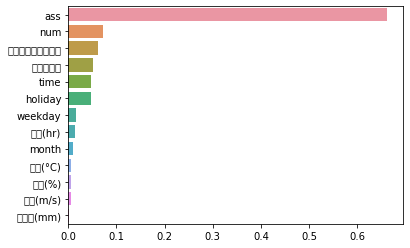

In [68]:
importance=pd.Series(xgb.feature_importances_, index=train2.columns).sort_values(ascending=False)
sns.barplot(importance, importance.index)
